# Pandas Time Series: Indexing by Time

# Pandas idősor - idő alapú indexelés 

Where the Pandas time series tools really become useful is when you begin to index data by timestamps. For example, we can construct a Series object that has time indexed data:

A Pandas kitűnő eszköz idősorok elemzésére, különösen ha az időt alkalmazzuk a rekordok indexelésére. 

In [1]:
import pandas as pd

In [2]:
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04', '2015-07-04', '2015-08-04'])
data = pd.Series([0,1,2,3],index)
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

In [3]:
data['2014-07-04':'2015-07-04']

2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64

In [4]:
data['2015']

2015-07-04    2
2015-08-04    3
dtype: int64

# Pandas

In [5]:
import pandas as pd

pd.to_datetime('2018-01-15 3:45pm')

Timestamp('2018-01-15 15:45:00')

In [6]:
pd.to_datetime('7/8/1952')

Timestamp('1952-07-08 00:00:00')

But what is the time format? In English speaking countries the key question is the place of the day and month. However, we can define specific time formats as well, according to the provided link.
<br> / <br> 
De mi a beolvasott dátum formátuma? Az angol nyelvű országokban a kulcs kérdés a nap és a hónap helye, de tudunk megadni saját, specifikus dátum formátumot is a megadott link szerint.
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Period.strftime.html#pandas-period-strftime

In [7]:
pd.to_datetime('7/8/1952', dayfirst=True)

Timestamp('1952-08-07 00:00:00')

In [8]:
pd.to_datetime('7/8/1952', format='%m/%d/%Y')

Timestamp('1952-07-08 00:00:00')

If we supply a list or array of strings as input to to_datetime(), it returns a sequence of date/time values in a DatetimeIndex object, which is the core data structure that powers much of pandas time series functionality. 
<br> / <br>
Ha egy listában adjuk meg a dátumokat a to_datetime() függvénynek, akkor egy listát kapunk vissza egy DatetimeIndex objektumban, mely támogatja a pandas legtöbb sorozatokra vonatkozó függvényét.
<br>
<br>
We can define the time format here as well. / Itt is megadhatjuk a kívánt dátum formátumot.

In [9]:
pd.to_datetime(['2018-01-05', '7/8/1952', 'Oct 10, 1995'])

DatetimeIndex(['2018-01-05', '1952-07-08', '1995-10-10'], dtype='datetime64[ns]', freq=None)

In [10]:
pd.to_datetime(['2/25/10', '8/6/17', '12/15/12'], format='%m/%d/%y')

DatetimeIndex(['2010-02-25', '2017-08-06', '2012-12-15'], dtype='datetime64[ns]', freq=None)

# Analyzing the Open Power System Data (OPSD) for Germany

The data set includes country-wide totals of electricity consumption, wind power production, and solar power production for 2006-2017. You can download the data from here: 
<br> / <br>
Az adatsor országos szinten tartalmazza az elektromos fogyasztásra vonatkozó adatokat, valamint a szél- és naperőművi fogyasztásra vonatkozó adatokat 2006-2017 között. Az adatsor letölthető innen: <br> https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv


<b>The columns / Az oszlopok:</b>
<ul>
  <li>Date — The date (yyyy-mm-dd format)</li>
  <li>Consumption — Electricity consumption in GWh</li>
  <li>Wind — Wind power production in GWh</li>
  <li>Solar — Solar power production in GWh</li>
  <li>Wind+Solar — Sum of wind and solar power production in GWh</li>
</ul>

<b>Questions / kérdések:</b>
<ul>
  <li>When is electricity consumption typically highest and lowest? / Mikor a legnagyobb és a legkisebb az energiafogyasztás?</li>
  <li>How do wind and solar power production vary with seasons of the year? / Hogyan változik a szél- és a napenergia termelése évszakonként?</li>
  <li>What are the long-term trends in electricity consumption, solar power, and wind power? / Hogyan alakulnak a hosszútávú trendek az elektromosságban, nap- és szélenergiában?</li>
  <li>How do wind and solar power production compare with electricity consumption, and how has this ratio changed over time? / Hogyan alakul a szél- és napenergia termelés mértéke az elektromos fogyasztáshoz képest és hogyan alakul ez az arány az időben?</li>
</ul>

In [11]:
opsd_daily = pd.read_csv('files/opsd_germany_daily.csv')
opsd_daily.shape

(4383, 5)

In [12]:
opsd_daily.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [13]:
opsd_daily.describe()

,Consumption,Wind,Solar,Wind+Solar
count,4383.000000,2920.000000,2188.000000,2187.000000
mean,1338.675836,164.814173,89.258695,272.663481
std,165.775710,143.692732,58.550099,146.319884
min,842.395000,5.757000,1.968000,21.478000
25%,1217.859000,62.353250,35.179250,172.185500
50%,1367.123000,119.098000,86.407000,240.991000
75%,1457.761000,217.900250,135.071500,338.988000
max,1709.568000,826.278000,241.580000,851.556000


In [14]:
opsd_daily.tail()

,Date,Consumption,Wind,Solar,Wind+Solar
4378,2017-12-27,1263.94091,394.507,16.530,411.037
4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714
4382,2017-12-31,1107.11488,721.176,19.980,741.156


In [15]:
opsd_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
Date           4383 non-null object
Consumption    4383 non-null float64
Wind           2920 non-null float64
Solar          2188 non-null float64
Wind+Solar     2187 non-null float64
dtypes: float64(4), object(1)
memory usage: 171.3+ KB


In [16]:
opsd_daily.dtypes

Date            object
Consumption    float64
Wind           float64
Solar          float64
Wind+Solar     float64
dtype: object

In [17]:
opsd_daily = pd.read_csv('files/opsd_germany_daily.csv',parse_dates=[0]) 

In [18]:
opsd_daily.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [19]:
opsd_daily.dtypes

Date           datetime64[ns]
Consumption           float64
Wind                  float64
Solar                 float64
Wind+Solar            float64
dtype: object

In [20]:
opsd_daily = opsd_daily.set_index('Date')
opsd_daily.head(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN


In [21]:
opsd_daily.index

DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05', '2006-01-06', '2006-01-07', '2006-01-08',
               '2006-01-09', '2006-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='Date', length=4383, freq=None)

Or in one step, using the parameters of the read_csv() function / Vagy egy lépésben a read_csv() függvény paramétereit felhasználva:

In [22]:
opsd_daily = pd.read_csv('files/opsd_germany_daily.csv',parse_dates=True,index_col=0)
opsd_daily.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


<b>Advantages of DatetimeIndex format</b> / <b>A DatetimeIndex fomrátum előnyei</b>
<br>
<br>
We can use the pandas' time-based solutions to analyse the data / Használhatjuk a pandas időalapú megoldásait az adatok elemzéséhez.

We can add columns with the year, month and weekday name / Hozzáadhatunk oszlopokat az év, a hónap és a hét napjának definiálsával.

In [23]:
opsd_daily['Year'] = opsd_daily.index.year
opsd_daily['Month'] = opsd_daily.index.month
opsd_daily['Weekday Name'] = opsd_daily.index.weekday_name

In [24]:
# Random sampling 5 rows
opsd_daily.sample(5,random_state=0)

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2008-08-23,1152.011,NaN,NaN,NaN,2008,8,Saturday
2013-08-08,1291.984,79.666,93.371,173.037,2013,8,Thursday
2009-08-27,1281.057,NaN,NaN,NaN,2009,8,Thursday
2015-10-02,1391.050,81.229,160.641,241.870,2015,10,Friday
2009-06-02,1201.522,NaN,NaN,NaN,2009,6,Tuesday


# Indexing

Using:
<ul>
  <li>a specific date</li>
  <li>date range</li>
  <li>partial-string (given a whole year or month - e.g.: opsd_daily.loc['2005'] or opsd_daily.loc['2012-06'])</li>
</ul>



In [25]:
opsd_daily.loc['2012-06-28']

Consumption      1352.23
Wind              44.803
Solar            148.484
Wind+Solar       193.287
Year                2012
Month                  6
Weekday Name    Thursday
Name: 2012-06-28 00:00:00, dtype: object

In [26]:
opsd_daily.loc['2015-01-20':'2015-01-22']

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2015-01-20,1629.730,16.737,10.790,27.527,2015,1,Tuesday
2015-01-21,1632.146,50.365,22.121,72.486,2015,1,Wednesday
2015-01-22,1636.978,62.294,12.119,74.413,2015,1,Thursday


In [27]:
opsd_daily.loc['2012-06']

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2012-06-01,1245.228,221.362,95.347,316.709,2012,6,Friday
2012-06-02,1050.443,121.440,135.864,257.304,2012,6,Saturday
2012-06-03,1004.252,44.170,63.568,107.738,2012,6,Sunday
2012-06-04,1309.374,59.878,86.217,146.095,2012,6,Monday
2012-06-05,1297.404,86.301,119.000,205.301,2012,6,Tuesday
2012-06-06,1315.237,63.311,85.520,148.831,2012,6,Wednesday
2012-06-07,1112.364,46.993,119.729,166.722,2012,6,Thursday
2012-06-08,1183.864,149.622,107.792,257.414,2012,6,Friday
2012-06-09,1051.796,206.779,132.212,338.991,2012,6,Saturday


# Visualizing

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# sns.set, rc : dict or None: Dictionary of rc parameter mappings to override the above.
sns.set(rc={'figure.figsize':(11,4)})

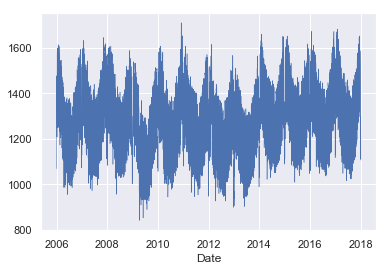

In [29]:
opsd_daily['Consumption'].plot(linewidth=0.5)
plt.show()

With so many data points, the line plot is quite crowded. Let's plot dots instead and plot the Solar and Wind time series as well on different subplots. / Ilyen sok adatpont mellett a line plot nagyon zsúfolt. Használjuk helyette a jelölőket és ábrázoljuk a Solar és Wind adatsorokat is sunplotokon.


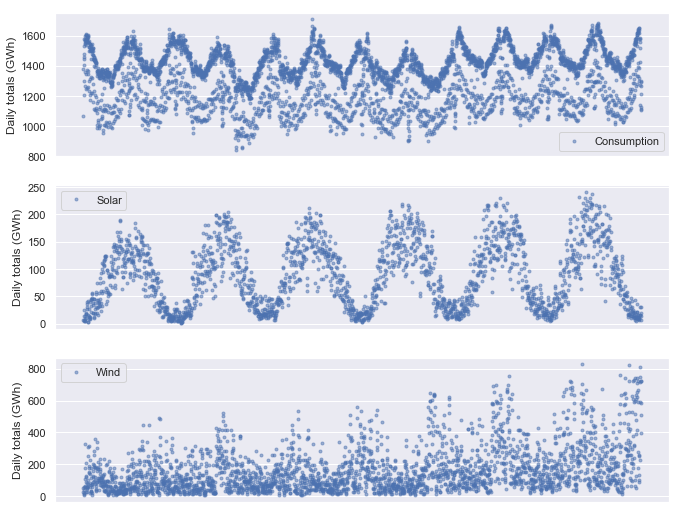

In [30]:

plt.subplot(3,1,1)
opsd_daily['Consumption'].plot(marker = '.',alpha = 0.5, linestyle='None',figsize=(11, 9))
plt.ylabel('Daily totals (GWh)')
plt.xticks([])
plt.xlabel('')
plt.legend()
plt.subplot(3,1,2)
opsd_daily['Solar'].plot(marker = '.',alpha = 0.5, linestyle='None')
plt.ylabel('Daily totals (GWh)')
plt.xticks([])
plt.xlabel('')
plt.legend()
plt.subplot(3,1,3)
opsd_daily['Wind'].plot(marker = '.',alpha = 0.5, linestyle='None')
plt.ylabel('Daily totals (GWh)')
plt.xticks([])
plt.xlabel('')
plt.legend()
plt.show()

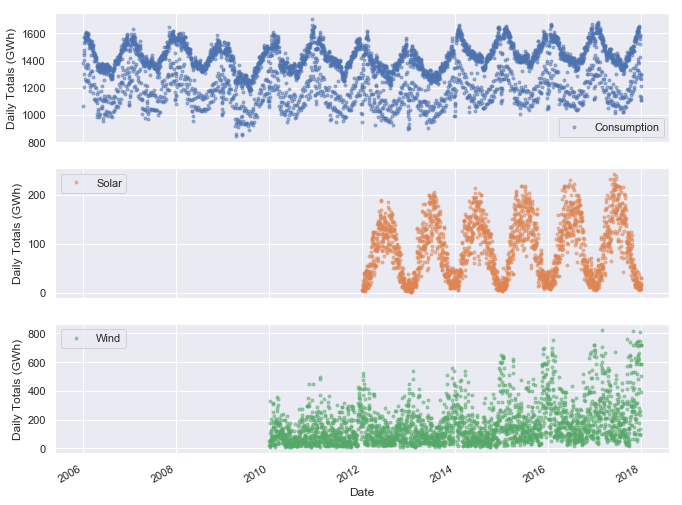

In [31]:
cols_plot = ['Consumption', 'Solar', 'Wind']
axes = opsd_daily[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Totals (GWh)')
plt.show()

<b> What can we see from this? / Mit látunk ebből? </b>
<br>
<br>
<ul>
  <li>Electricity consumption is highest in winter / Az elektromos felhasználás télen a legnagyobb</li>
  <li>Electricity consumption appears to split into two clusters — one with oscillations centered roughly around 1400 GWh, and another with fewer and more scattered data points, centered roughly around 1150 GWh. We might guess that these clusters correspond with weekdays and weekends, and we will investigate this further shortly. / Az elektormos áram felhasználás mennyisége két eltérő "góc" körül összpontosul: 1400 GWh és 1150 GWh környékén, feltétlezhetően a hétköznapi és a hétvégi fogyasztás elkülönülését láthatjuk.</li>
  <li>Solar power production is highest in summer. / A napenergia nyáron a legnagyobb.</li>
  <li>Wind power production is highest in winter. / A szélenergia télen a legnagyobb.</li>
  <li>Apears to be a strong increasing trend in wind power production over the years. / Úgy tűnik van egy erős növekvő trend a szélenergia mennyiségében. </li>
</ul>

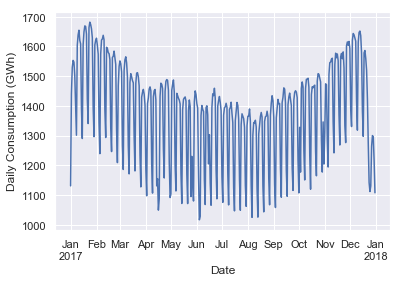

In [32]:
ax = opsd_daily['Consumption'].loc['2017'].plot()
ax.set_ylabel('Daily Consumption (GWh)')
plt.show()

Now the weakly oscillations are clearly seen. Drastic decrease in December and January, during the holidays. / A heti ingadoázsok tisztán látszanak. Nagy visszaesés jelentkezik decemberben és januárban az ünnepek alatt.
<br>
<br>
Let's see a month! / Nézzünk meg egy hónapot!

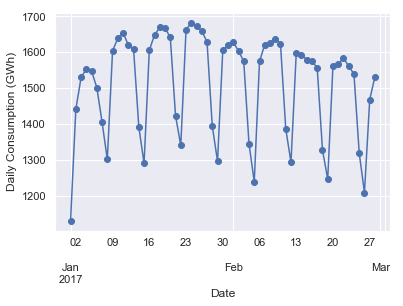

In [33]:
ax = opsd_daily['Consumption'].loc['2017-01':'2017-02'].plot(marker='o', linestyle='-')
ax.set_ylabel('Daily Consumption (GWh)')
plt.show()

Consumption is highest during the weekdays and lowest on weekends. / A fogyasztás hétközben a legnagyobb és hétvégén a legkisebb.

In [34]:
import matplotlib.dates as mdates

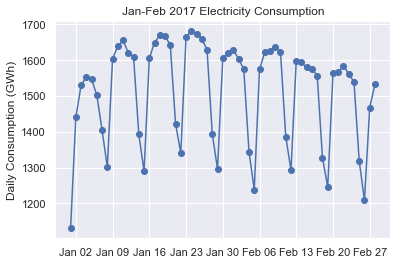

In [35]:
fig, ax = plt.subplots()
ax.plot(opsd_daily['Consumption'].loc['2017-01':'2017-02'],marker = 'o',linestyle='-')
ax.set_ylabel('Daily Consumption (GWh)')
ax.set_title('Jan-Feb 2017 Electricity Consumption')

# Set x-axis major ticks on Mondays
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday = mdates.MONDAY))

# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

plt.show()

# Seasonality / Szezonalitás

Let's explore our dataset y the boxplot() function and group the data by different time periods. First, let's see the yearly seasonality and group the data by month. / Vizsgáljuk meg az adatsorunkat a boxplot() függvénnyel és csoportosítsuk különböző időszakokra. Elsőként lássuk az éves szezonalitást és csoportosítsuk az adatokat hónapokra.

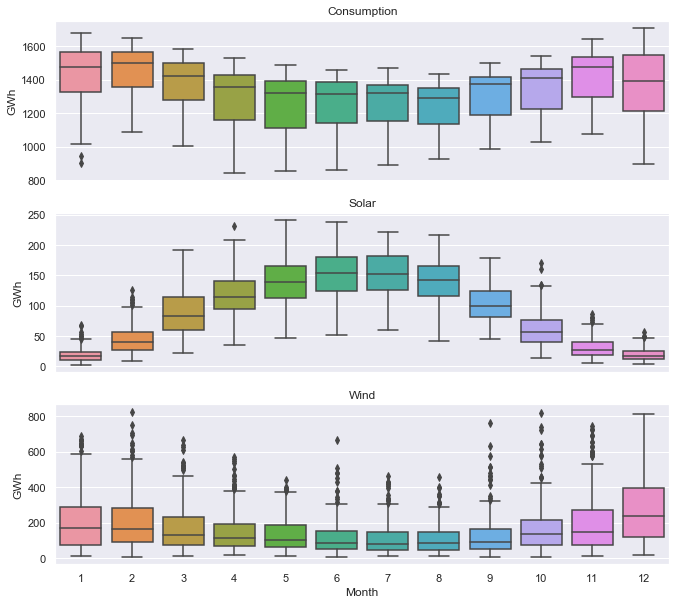

In [36]:
fig, axes = plt.subplots(3,1,figsize=(11,10),sharex = True)

for name, ax in zip(['Consumption','Solar','Wind'],axes):
    sns.boxplot(data=opsd_daily,x='Month',y=name,ax=ax)
    ax.set_ylabel('GWh')
    ax.set_title(name)

    if ax!=axes[-1]:
        ax.set_xlabel('')

plt.show()

<ul>
  <li>Although electricity consumption is generally higher in winter and lower in summer, the median and lower two quartiles are lower in December and January compared to November and February, likely due to businesses being closed over the holidays. We saw this in the time series for the year 2017, and the box plot confirms that this is consistent pattern throughout the years. <br> / <br> Habár az elektromos fogyasztás átlagosan nagyobb télen és kisebb nyáron, láthatjuk, hogy a medián és az alsó kvartilis decemberben és januárban kisebb, mint novemberben és februárban, valószínűleg mivel az üzletek zárva tartanak az ünnepek alatt. Ezt már láthattuk az éves idősor ábrázolása során is és a boxplot igazolja, hogy ez több évre értelmezve is igaz lesz.</li>
  <li>While solar and wind power production both exhibit a yearly seasonality, the wind power distributions have many more outliers, reflecting the effects of occasional extreme wind speeds associated with storms and other transient weather conditions. 
  <br> / <br> 
  Habár a mind a nap- és szélenergia rendelkezik éves szezonalitással, a szélenergia esetében sokkal több kiugró 'outlier' értéket láthatunk, valószínűleg a viharoknak és más extrém időjárási helyzeteknek köszönhetően.
  </ul>

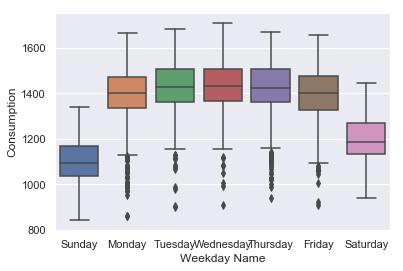

In [37]:
sns.boxplot(data=opsd_daily,x='Weekday Name',y='Consumption')
plt.show()

As expected, electricity consumption is significantly higher on weekdays than on weekends. The low outliers on weekdays are presumably during holidays. / Ahogy várható volt az elektromos fogyasztás jelentősen nagyobb hétköznap, mint hétvégén. A lefelé mutató hétköznapra eső outlier-ek valószínűleg az ünnepnapokat mutatják.

# Autocorrelation & seasonal decomposition
<br>
<b>Autocorrelation</b>: <br>
Autocorrelation plots are often used for checking randomness in time series. This is done by computing autocorrelations for data values at varying time lags. If time series is random, such autocorrelations should be near zero for any and all time-lag separations. If time series is non-random then one or more of the autocorrelations will be significantly non-zero. The horizontal lines displayed in the plot correspond to 95% and 99% confidence bands. The dashed line is 99% confidence band. See the Wikipedia entry for more about autocorrelation plots and https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#visualization-autocorrelation for example.

<br>
<b>Seasonal decomposition</b>: <br>

In [38]:
from pandas.plotting import autocorrelation_plot

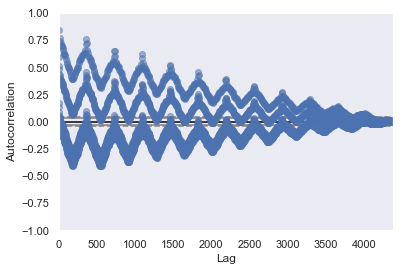

In [39]:
autocorrelation_plot(opsd_daily['Consumption'],marker='o',alpha = 0.5, linestyle='')#linewidth=0.2,  .loc['2014':'2015']
plt.show()

In [40]:
opsd_daily.index

DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05', '2006-01-06', '2006-01-07', '2006-01-08',
               '2006-01-09', '2006-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='Date', length=4383, freq=None)

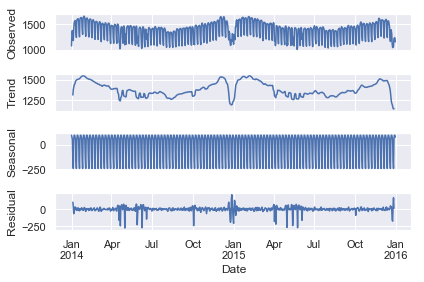

In [41]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(opsd_daily['Consumption'].loc['2014':'2015'], model='additive')
result.plot()
plt.show()

# Resampling

<br>
It is often useful to resample our time series data to a lower or higher frequency. Resampling to a lower frequency (downsampling) usually involves an aggregation operation — for example, computing monthly sales totals from daily data. The daily OPSD data we’re working with in this tutorial was downsampled from the original hourly time series. Resampling to a higher frequency (upsampling) is less common and often involves interpolation or other data filling method — for example, interpolating hourly weather data to 10 minute intervals for input to a scientific model. 
<br> / <br>
Sokszor nagyon hasznos újra mintavételezni az adatokat egy nagyobb vagy kisebb frekvenciával. A kisebb frekvenciára való mintázás egy aggregációs műveletet jelent, például hónapos összeértékek számítását napi adatokból. A napi OPSD adatok, amivel eddig dolgoztunk eredetileg órás adatokból lettek újramintázva. A nagyobb frekvenciára való újramintázás ritkább (bár esetünkben a folyamatváltozók és a labormérések esetén pont erre van szükség) és általában interpolációs vagy más adatfeltöltési módszert jelent. Ilyen lehet például egy órás időjárási adat interpolációja 10 perces értékekre egy tudományos modell számára.

We will focus here on downsampling, exploring how it can help us analyze our OPSD data on various time scales. We use the DataFrame’s resample() method, which splits the DatetimeIndex into time bins and groups the data by time bin. The resample() method returns a Resampler object, similar to a pandas GroupBy object. We can then apply an aggregation method such as mean(), median(), sum(), etc., to the data group for each time bin.
<br> / <br>
Most a kisebb frekvenciára való újramintázásra fogunk koncentrálni, hogy az OPSD adatokat különböző időskálákon tudjuk elemezni. A DataFrame resample függvényét fogjuk használni, ami az időindexeket (DatetimeIndex) osztja kisebb "dobozokra", majd ezeket valamilyen módszerrel összegzi. A resample függvény visszaad egy Resampler objektumot, hasonlóan a pandas GroupBy objektumához. Ezen az objektumon tudjuk alkalmazni a mean(), median(), sum(), stb. függvényeket. 

| Code   | Description         | Code   | Description          |
|--------|---------------------|--------|----------------------|
| ``D``  | Calendar day        | ``B``  | Business day         |
| ``W``  | Weekly              |        |                      |
| ``M``  | Month end           | ``BM`` | Business month end   |
| ``Q``  | Quarter end         | ``BQ`` | Business quarter end |
| ``A``  | Year end            | ``BA`` | Business year end    |
| ``H``  | Hours               | ``BH`` | Business hours       |
| ``T``  | Minutes             |        |                      |
| ``S``  | Seconds             |        |                      |
| ``L``  | Milliseonds         |        |                      |
| ``U``  | Microseconds        |        |                      |
| ``N``  | nanoseconds         |        |                      |

In [42]:
# Specify the data columns we want to include (i.e. exclude Year, Month, Weekday Name)
data_columns = ['Consumption', 'Wind', 'Solar', 'Wind+Solar']

# Resample to weekly frequency, aggregating with mean
opsd_weekly_mean = opsd_daily[data_columns].resample('W').mean()
opsd_weekly_mean.head(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184000,NaN,NaN,NaN
2006-01-08,1381.300143,NaN,NaN,NaN
2006-01-15,1486.730286,NaN,NaN,NaN


The first row above, labelled 2006-01-01, contains the mean of all the data contained in the time bin 2006-01-01 through 2006-01-07. The second row, labelled 2006-01-08, contains the mean data for the 2006-01-08 through 2006-01-14 time bin, and so on. By default, each row of the downsampled time series is labelled with the left edge of the time bin. 
<br> / <br>
Az első sor a 2006-01-01 dátummal tartalmazza az 2006-01-01 és 2006-01-07 közötti adatok átlagát. Alapbeállításként minden újramintavételezett adat a "doboz" bal széléhez kerül definiálásra.

In [43]:
print(opsd_daily.shape[0])
print(opsd_weekly_mean.shape[0])

4383
627


Let’s plot the daily and weekly Solar time series together over a single six-month period to compare them.
<br> / <br>
Ábrázoljuk a napi és heti Solar adatokat együtt egy 6 hónapos periódusban! 
<br><br>
start, end = '2017-01', '2017-06'

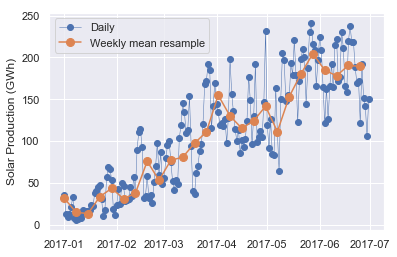

In [44]:
start, end = '2017-01', '2017-06'

fig, ax = plt.subplots()

ax.plot(opsd_daily['Solar'].loc[start:end],marker='o',linestyle='-',label='Daily',linewidth=0.5)
ax.plot(opsd_weekly_mean['Solar'].loc[start:end],marker='o',linestyle='-',markersize=8,label='Weekly mean resample')
ax.set_ylabel('Solar Production (GWh)')
ax.legend()
plt.show()


We can see that the weekly mean time series is smoother than the daily time series because higher frequency variability has been averaged out in the resampling. / Csökkent a variablilitás, simult az adatsor, hiszen az átlag mindig "simít".

Now let’s resample the data to monthly frequency, aggregating with sum totals instead of the mean. Unlike aggregating with mean(), which sets the output to NaN for any period with all missing data, the default behavior of sum() will return output of 0 as the sum of missing data. We use the min_count parameter to change this behavior.

In [45]:
opsd_monthly = opsd_daily[data_columns].resample('M').sum()
opsd_monthly.head(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-31,45304.704,0.0,0.0,0.0
2006-02-28,41078.993,0.0,0.0,0.0
2006-03-31,43978.124,0.0,0.0,0.0


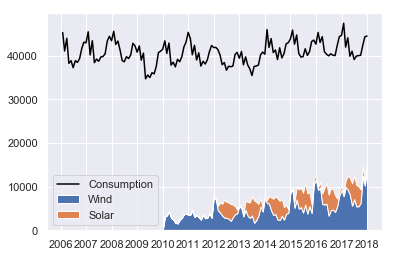

In [46]:
fig, ax = plt.subplots()

ax.plot(opsd_monthly['Consumption'],color='black', label='Consumption')
#opsd_monthly[['Wind', 'Solar']].plot.area(ax=ax,linewidth=0)
ax.stackplot(opsd_monthly.index,opsd_monthly['Wind'],opsd_monthly['Solar'],labels=['Wind','Solar'])
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
plt.show()

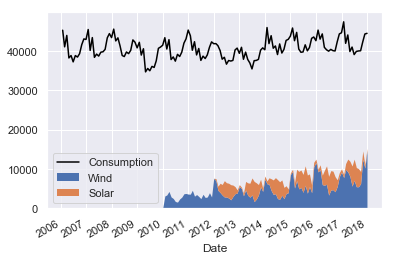

In [47]:
fig, ax = plt.subplots()

ax.plot(opsd_monthly['Consumption'],color='black', label='Consumption')
opsd_monthly[['Wind', 'Solar']].plot.area(ax=ax,linewidth=0)


ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
plt.show()

At this monthly time scale, we can clearly see the yearly seasonality in each time series, and it is also evident that electricity consumption has been fairly stable over time, while wind power production has been growing steadily, with wind + solar power comprising an increasing share of the electricity consumed.
<br> / <br>
Ezen a havi időskálán jól látható a szezonalitás minden adatsorban, illetve az is jól látható, hogy az elektromos fogyasztás viszonylag stabilnak mondható az időben. A szélenergia aránya növekvő tendenciát mutat, illetve az is látható, hogy az elektromos fogyasztás egyre nagyobb hányada származik a szél+napenergia forrásból.

Let’s explore this further by resampling to annual frequency and computing the ratio of Wind+Solar to Consumption for each year.
<br> / <br>
Vizsgáljuk ezt meg részletesebben az adatok éves szintre történő aggregálásával és a Wind+Solar arányának kiszámításával a Consumption-höz képest.

In [48]:
# Compute the annual sums, setting the value to NaN for any year which has
# fewer than 360 days of data

opsd_annual = opsd_daily[data_columns].resample('A')
opsd_annual = opsd_annual.sum()

# The default index of the resampled DataFrame is the last day of each year,
# ('2006-12-31', '2007-12-31', etc.) so to make life easier, set the index
# to the year component
opsd_annual = opsd_annual.set_index(opsd_annual.index.year)
opsd_annual.index.name = 'Year'

# Compute the ratio of Wind+Solar to Consumption
opsd_annual['Wind+Solar/Consumption'] = opsd_annual['Wind+Solar']/opsd_annual['Consumption']
opsd_annual.tail()

,Consumption,Wind,Solar,Wind+Solar,Wind+Solar/Consumption
Year,,,,,
2013,463336.85300,47197.832,29559.780,76697.443,0.165533
2014,504164.82100,51107.672,32498.307,83370.502,0.165364
2015,505264.56300,77468.994,34907.138,112376.132,0.222410
2016,505927.35400,77008.126,34562.824,111570.950,0.220528
2017,504736.36939,102667.365,35882.643,138550.008,0.274500


Finally, let’s plot the wind + solar share of annual electricity consumption as a bar chart.
<br> / <br>
Végül ábrázoljuk a wind + solar arányát az elektromos fogyasztáshoz képest egy bar chart-on.

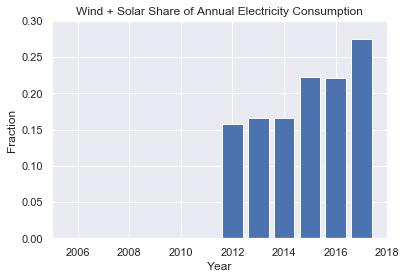

In [49]:
fig, ax = plt.subplots()

ax.bar(opsd_annual.index,opsd_annual['Wind+Solar/Consumption'])
ax.set_ylabel('Fraction')
ax.set_xlabel('Year')
ax.set_title('Wind + Solar Share of Annual Electricity Consumption')
ax.set_ylim(0, 0.3)
plt.show()

# Rolling windows

Rolling window operations are another important transformation for time series data. Similar to downsampling, rolling windows split the data into time windows and the data in each window is aggregated with a function such as mean(), median(), sum(), etc. However, unlike downsampling, where the time bins do not overlap and the output is at a lower frequency than the input, rolling windows overlap and “roll” along at the same frequency as the data, so the transformed time series is at the same frequency as the original time series.
<br> / <br>
A mozgóablakokkal az újramintavételezéshez hasonlóan ablakokra osztjuk az idősorunkat, ahol ezeken az ablakokon aztán alkalmazhatóak a mean(), median(), sum(), stb. műveletek. De ellentétben a mintavételezéssel, ahol az időablakok nem lapolnak át és így a kimenet egy kisebb mintavételezésű adatsor, a mozgóablakok "átgördülnek" az eredeti adatsoron, így ugyanolyan sűrűséggel tartalmazzák majd az adatokat, mint az eredeti adatsor.

Let’s use the rolling() method to compute the 7-day rolling mean of our daily data. We use the center=True argument to label each window at its midpoint, so the rolling windows are: / Alkalmazzuk a rolling() függvényt, hogy kiszámítsuk a 7-napos mozgó átlagát a napi adatainknak. Alkalmazzuk a center=True argumentumot, hogy minden adatpontot az ablak közepével címkézzünk, így az ablakok a következőek:
<ul>
  <li>2006-01-01 to 2006-01-07 — labelled as 2006-01-04</li>
  <li>2006-01-02 to 2006-01-08 — labelled as 2006-01-05</li>
  <li>2006-01-03 to 2006-01-09 — labelled as 2006-01-06</li>
  <li>and so on…</li>
</ul>





In [50]:
opsd_7d = opsd_daily[data_columns].rolling(7,center = True).mean()
opsd_7d.head(10)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,NaN,NaN,NaN,NaN
2006-01-02,NaN,NaN,NaN,NaN
2006-01-03,NaN,NaN,NaN,NaN
2006-01-04,1361.471429,NaN,NaN,NaN
2006-01-05,1381.300143,NaN,NaN,NaN
2006-01-06,1402.557571,NaN,NaN,NaN
2006-01-07,1421.754429,NaN,NaN,NaN
2006-01-08,1438.891429,NaN,NaN,NaN
2006-01-09,1449.769857,NaN,NaN,NaN


To visualize the differences between rolling mean and resampling, let’s update our earlier plot of January-June 2017 solar power production to include the 7-day rolling mean along with the weekly mean resampled time series and the original daily data.
<br> / <br>
Hogy ábrázoljuk a különbséget a mozgó átlag és a mintavételezés között, frissítsük a korábbi January-June 2017 napenergia ábránkat.


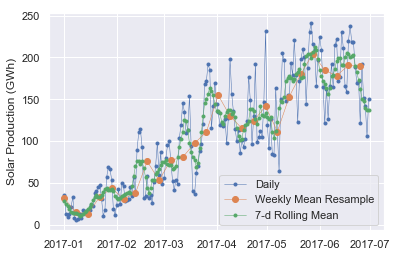

In [51]:
start, end = '2017-01', '2017-06'

fig, ax = plt.subplots()

ax.plot(opsd_daily['Solar'].loc[start:end],marker='.',linestyle='-',linewidth=0.5,label='Daily')

ax.plot(opsd_weekly_mean['Solar'].loc[start:end],marker='o',linestyle='-',linewidth=0.5,label='Weekly Mean Resample')

ax.plot(opsd_7d['Solar'].loc[start:end],marker='.',linestyle='-',linewidth=0.5,label='7-d Rolling Mean')

ax.set_ylabel('Solar Production (GWh)')
ax.legend()
plt.show()

We can see that data points in the rolling mean time series have the same spacing as the daily data, but the curve is smoother because higher frequency variability has been averaged out. In the rolling mean time series, the peaks and troughs tend to align closely with the peaks and troughs of the daily time series. In contrast, the peaks and troughs in the weekly resampled time series are less closely aligned with the daily time series, since the resampled time series is at a coarser granularity.
<br> / <br>
Látható,hogy ugyanaz a mozgóablakos adatsor felbontása, mint az eredetié, de a görbe sokkal "simább", mivel a nagyobb variabilitás ki lett átlagolva. Ez az adatsor azonban jobban együtt mozog az eredetivel, hiszen az újra mintázott adatsor felbontása jóval kisebb.

# Trends

A rolling mean tends to smooth a time series by averaging out variations at frequencies much higher than the window size and averaging out any seasonality on a time scale equal to the window size. This allows lower-frequency variations in the data to be explored. Since our electricity consumption time series has weekly and yearly seasonality, let’s look at rolling means on those two time scales.
<br> / <br>
A mozgóablak kisimít minden szezonalitást, ami az ablak méretében van. Nézzük meg a heti és éves szezonalitását az elektromos fogyasztásnak.

In [52]:
opsd_365d = opsd_daily[data_columns].rolling(window=365,center=True,min_periods=360).mean()

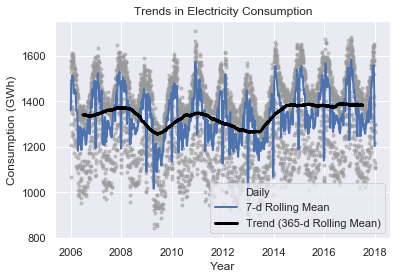

In [53]:
# Plot daily, 7-day rolling mean, and 365-day rolling mean time series
fig, ax = plt.subplots()

ax.plot(opsd_daily['Consumption'],marker='.',linestyle='',color = '0.6',label='Daily',alpha=0.5)

ax.plot(opsd_7d['Consumption'],linewidth=2,label='7-d Rolling Mean')
ax.plot(opsd_365d['Consumption'],linewidth=3,color='black',label='Trend (365-d Rolling Mean)')

ax.set_xlabel('Year')
ax.set_ylabel('Consumption (GWh)')
ax.set_title('Trends in Electricity Consumption');
ax.legend()
plt.show()

We can see that the 7-day rolling mean has smoothed out all the weekly seasonality, while preserving the yearly seasonality. The 7-day rolling mean reveals that while electricity consumption is typically higher in winter and lower in summer, there is a dramatic decrease for a few weeks every winter at the end of December and beginning of January, during the holidays.

Looking at the 365-day rolling mean time series, we can see that the long-term trend in electricity consumption is pretty flat, with a couple of periods of anomalously low consumption around 2009 and 2012-2013.

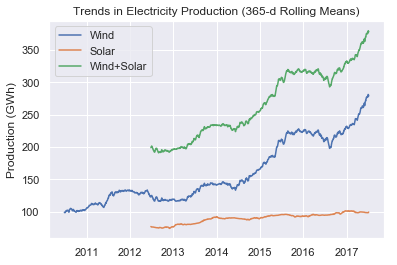

In [54]:
# Plot 365-day rolling mean time series of wind and solar power
fig, ax = plt.subplots()
for nm in ['Wind','Solar','Wind+Solar']:
    ax.plot(opsd_365d[nm],label=nm)

ax.set_ylabel('Production (GWh)')
ax.set_title('Trends in Electricity Production (365-d Rolling Means)')
ax.legend()
plt.show()

Resampling fill forward, fill backward
